<a href="https://colab.research.google.com/github/nanangyudi/2020pds_d/blob/main/Tugas_Besar_Alma_Nissa_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Deskripsi Tujuan Bisnis**


1. Dengan adanya data ini user akan mengetahui Top 50 spotify songs in 2019.
2. Dapat mengetahui tangga lagu yang populer pada tahun 2019 di spotify
3. Dapat mengetahui lagu mana saja yang paling sering didengarkan, artis yang populer di tahun 2019.


> **Analisa Pendekatan**

Pada analisa menggunakan data set yang berjudul "Top 50 Spotify Songs - 2019" ini peneliti menggunakan pendekatan *Exploratory Data Analysis* atau disebut dengan EDA. EDA merupakan sebuah metode eksplorasi data yang  menggunakan teknik aritmatika sederhana dan teknik grafis untuk meringkas data pada sebuah pengamatan.
Langkah-langkah yang terdapat dalam metode EDA ini urutannya sebagai berikut:
Masalah -> Data -> Analisis -> Model -> Kesimpulan.

> **Pengumpulan Data**

Dalam analisa data science kali ini peneliti menggunakan dataset yang berjudul **"Top 50 Spotify Songs - 2019"**. Dataset ini diambil dari website kaggle.com yang diupload oleh Leornardo Henrique. 




> **Pemahaman Data**

Dalam dataset ini memuat beberapa data terkait list 50 lagu yang masuk dalam kategori paling top di spotify pada tahun 2019 yang nantinya dapat dianalisa. Pada dataset ini terdapat beberapa kolom yang berisi list top 50 lagu dimulai dari judul lagu, nama artis, genre lagu, jumlah beats per menitnya, energy, danceability, loudness, liveness, valence, length, acousticness, speechiness, dan jumlah popularity. Analisa data yang dapat diambil adalah Lagu yang mempunyai tingkat popularity tinggi dan rendah, melihat tingkat kepopularitas suatu lagu berdasarkan kualitas musik





> **Eksplorasi Data**




- **Mempersiapkan Data**

Pada analisa kali ini menggunakan library "pandas", "numpy", dan "seaborn"

In [ ]:
import pandas as pd
import os 
os.listdir ('sample_data')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



sns.set()

1. **Memasukkan Dataset**

In [ ]:
url = 'https://raw.githubusercontent.com/AlmaNissa/Data-Pyton/main/top50.csv'
Spotify = pd.read_csv(url, error_bad_lines=False)

> **2. Menampilkan Data**

Dibawah ini merupakan tabel dataset Top 50 Spotify Songs - 2019

In [ ]:
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


> **3. Melihat Dimensi Data**

Pada tahapan ini kita dapat melihat dimensi data yang terdapat pada dataset Top 50 Spotify Songs - 2019






In [ ]:
dimensi      = Spotify.shape
panjang_data = len(Spotify)
print(f'Dimensi data adalah {dimensi[0]} baris, dan {dimensi[1]} kolom')

Dimensi data adalah 50 baris, dan 14 kolom




> **4. Cek Missing Values**

Pada tahapan ini kita dapat melihat apakah pada dataset ini terdapat nilai kosong atau tidak.



In [ ]:
Spotify.isnull().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
kluster             0
dtype: int64

> **Pemodelan Data**

**1. Frekuensi Data Berdasarkan Popularity**

Pada Grafik dibawah ini dapat dianalisis bahwa pada dataset ini membentuk skewness negatif. Dan popularitas lagu dapat dilihat dari kualitas musik dari lagu tersebut.



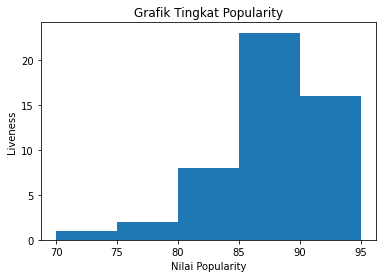

In [ ]:
fig=plt.figure()

ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(df['Popularity'],bins = 5)

#Labels and Tit
plt.title('Grafik Tingkat Popularity')
plt.xlabel('Nilai Popularity')
plt.ylabel('Liveness')
plt.show()

**2. Melihat keterkaitan hubungan data Scatter Plot**

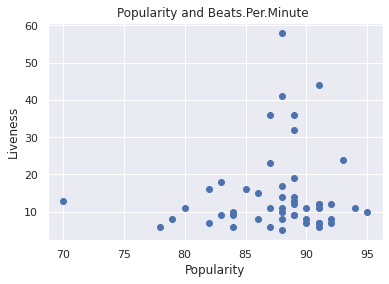

In [ ]:
fig=plt.figure()

#Create one or more subplots usingadd_subplot, because you can'tcreate blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.scatter(Spotify['Popularity'],Spotify['Liveness'])

#Labels and Tit
plt.title('Popularity and Beats.Per.Minute ')
plt.xlabel('Popularity')
plt.ylabel('Liveness')
plt.show()

Pada analisa scatter plot diatas dapat disimpulkan bahwa dataset ini merupakan kategori data normal.

**3. Box Plot**

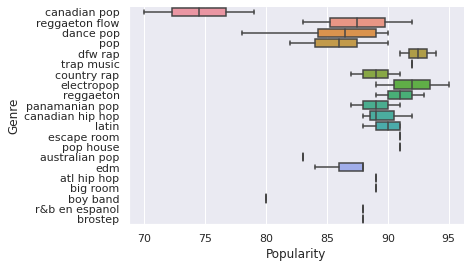

In [ ]:
sns.boxplot(data=Spotify, x='Popularity', y='Genre')
sns.despine()
plt.show()

Berdasarkan Boxplot diatas dapat dianalisa bahwa:
*   Nilai Median untuk setiap genre pada boxplot ini terdapat perbedaan dan tidak kesamaan satu sama lain. 
*   IQR (interquartile range) atau simpangan kuartil. IQR adalah ukuran yang digunakan untuk mengukur penyebaran data. Jika Semakin lebar boxplot maka menunjukkan data semakin menyebar. Maka dapat dilihat bahwa IQR tingkat popularitas dalam masing masing masing genre tersebar merata. 



**4. Tabel Frekuensi**

Tabel Frekuensi dibawah ini digunakan untuk mengelompokkan nilai popularitas pada setiap lagu yang ada dalam TOP 50 Spotify tahun 2019.

In [ ]:
test= Spotify.groupby(['Track.Name','Popularity'])
test.size()

Track.Name                                                          Popularity
0.958333333333333                                                   89            1
7 rings                                                             89            1
Antisocial (with Travis Scott)                                      87            1
Beautiful People (feat. Khalid)                                     86            1
Call You Mine                                                       88            1
Callaita                                                            93            1
China                                                               92            1
Con Altura                                                          88            1
Con Calma                                                           91            1
Cross Me (feat. Chance the Rapper & PnB Rock)                       82            1
Dance Monkey                                                        83           

**5. Mengelompokkan Variabel**

In [ ]:
test= Spotify.groupby(['Popularity'])
test.describe()

Beats.Per.Minute                                               \
                      count        mean        std    min     25%    50%   
Popularity                                                                 
70                      1.0  124.000000        NaN  124.0  124.00  124.0   
78                      1.0   95.000000        NaN   95.0   95.00   95.0   
79                      1.0  117.000000        NaN  117.0  117.00  117.0   
80                      1.0  138.000000        NaN  138.0  138.00  138.0   
82                      2.0   94.000000   1.414214   93.0   93.50   94.0   
83                      2.0   95.000000   4.242641   92.0   93.50   95.0   
84                      3.0  107.666667  25.967929   85.0   93.50  102.0   
85                      1.0  190.000000        NaN  190.0  190.00  190.0   
86                      2.0   94.500000   2.121320   93.0   93.75   94.5   
87                      4.0  140.000000  33.625387   96.0  126.00  144.0   
88                      8.0  113.750000  27.886249   88.0   99.50  104.0   
89                      8.0  109.000000  18.738806   93.0   96.00   99.0   
90                      3.0  124.000000  46.872167   85.0   98.00  111.0   
91                      7.0  126.857143  36.015870   90.0   93.00  124.0   
92                      3.0  128.666667  44.500936  101.0  103.00  105.0   
93                      1.0  176.000000        NaN  176.0  176.00  176.0   
94                      1.0  150.000000        NaN  150.0  150.00  150.0   
95                      1.0  135.000000        NaN  135.0  135.00  135.0   

                          Energy                                           \
               75%    max  count       mean        std   min    25%   50%   
Popularity                                                                  
70          124.00  124.0    1.0  82.000000        NaN  82.0  82.00  82.0   
78           95.00   95.0    1.0  56.000000        NaN  56.0  56.00  56.0   
79          117.00  117.0    1.0  55.000000        NaN  55.0  55.00  55.0   
80          138.00  138.0    1.0  73.000000        NaN  73.0  73.00  73.0   
82           94.50   95.0    2.0  62.000000  24.041631  45.0  53.50  62.0   
83           96.50   98.0    2.0  69.000000  14.142136  59.0  64.00  69.0   
84          119.00  136.0    3.0  53.000000  14.106736  40.0  45.50  51.0   
85          190.00  190.0    1.0  80.000000        NaN  80.0  80.00  80.0   
86           95.25   96.0    2.0  68.000000   4.242641  65.0  66.50  68.0   
87          158.00  176.0    4.0  65.500000  19.739976  39.0  56.25  70.5   
88          115.00  176.0    8.0  62.875000  14.980344  39.0  56.75  68.5   
89          119.25  140.0    8.0  61.500000  19.265068  32.0  45.75  65.0   
90          143.50  176.0    3.0  67.000000   1.732051  65.0  66.50  68.0   
91          156.00  176.0    7.0  68.142857  12.785781  48.0  60.50  70.0   
92          142.50  180.0    3.0  65.000000  15.524175  50.0  57.00  64.0   
93          176.00  176.0    1.0  62.000000        NaN  62.0  62.00  62.0   
94          150.00  150.0    1.0  65.000000        NaN  65.0  65.00  65.0   
95          135.00  135.0    1.0  43.000000        NaN  43.0  43.00  43.0   

                        Danceability                                           \
              75%   max        count       mean        std   min    25%   50%   
Popularity                                                                      
70          82.00  82.0          1.0  69.000000        NaN  69.0  69.00  69.0   
78          56.00  56.0          1.0  81.000000        NaN  81.0  81.00  81.0   
79          55.00  55.0          1.0  76.000000        NaN  76.0  76.00  76.0   
80          73.00  73.0          1.0  84.000000        NaN  84.0  84.00  84.0   
82          70.50  79.0          2.0  72.500000   3.535534  70.0  71.25  72.5   
83          74.00  79.0          2.0  81.500000   0.707107  81.0  81.25  81.5   
84          59.50  68.0          3.0  66.333333  32.715949  29.0  5

**6. Corellation Mapping**

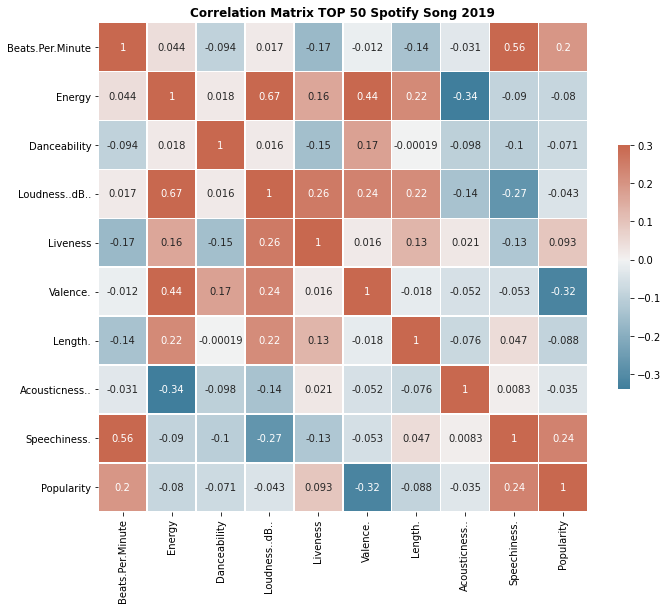

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(),annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix TOP 50 Spotify Song 2019",fontweight="bold")
plt.show()

Berdasarkan mapping diatas maka terjadinya korelasi antara Speechness dan Beats per minute (BPM), kemudian Energy dan Loudness.

7. Pengelompokan Index Integer 

In [ ]:

Spotify_x = Spotify.iloc[:, 3:13]
Spotify_x.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,117,55,76,-6,8,75,191,4,3,79
1,105,81,79,-4,8,61,302,8,9,92
2,190,80,40,-4,16,70,186,12,46,85
3,93,65,64,-8,8,55,198,12,19,86
4,150,65,58,-4,11,18,175,45,7,94


kolom diatas merupakan kolom yang memiliki nilai integer.

8. pengelompokan menggunakan merode elbow 

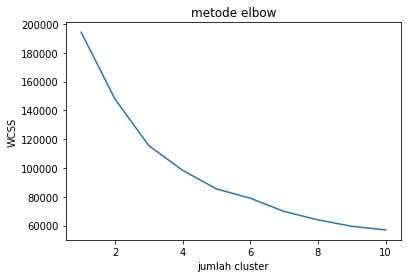

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(Spotify_x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('metode elbow')
plt.xlabel('jumlah cluster')
plt.ylabel('WCSS')
plt.show()

Analisis : Pengelompokan menggunakan metode Elbow untuk mengetahui jumlah cluster yang optimal. Untuk mendapatkan nilai yang digunakan dalam grafik, beberapa model menggunakan jumlah cluster yang berbeda dan menyimpan nilai intertia_properti (WCSS) setiap saat.

WCSS didefinisikan sebagai jumlah jarak kuadrat antara setiap anggota cluster dan pusatnya.

**9. Pengelompkan KMeans Clustering **




In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Spotify_x)

In [ ]:
print(kmeans.cluster_centers_)

[[178.33333333  71.83333333  65.16666667  -4.33333333  12.66666667
   59.16666667 232.66666667  22.          28.16666667  89.        ]
 [ 95.5         70.75        77.5         -4.75        19.25
   53.25       284.5         17.5          8.75        87.        ]
 [101.42857143  69.85714286  75.35714286  -5.07142857  10.64285714
   75.64285714 191.57142857  21.28571429  10.21428571  84.64285714]
 [141.84615385  56.84615385  73.69230769  -7.23076923  12.38461538
   47.84615385 165.92307692  20.92307692  15.46153846  89.76923077]
 [ 99.          59.38461538  65.76923077  -5.61538462  20.76923077
   37.         205.76923077  25.84615385   5.84615385  87.76923077]]


Prediksi yang didapatkan dari pengelompokan jumlah data Spotify_x  Membentuk matriks 3x3 dari pengelompokkan nilai tengah.

10. Pengelompokan berdasarkan Array

In [ ]:
x_array =  np.array(Spotify_x)
print(x_array)

[[117  55  76  -6   8  75 191   4   3  79]
 [105  81  79  -4   8  61 302   8   9  92]
 [190  80  40  -4  16  70 186  12  46  85]
 [ 93  65  64  -8   8  55 198  12  19  86]
 [150  65  58  -4  11  18 175  45   7  94]
 [102  68  80  -5   9  84 220   9   4  84]
 [180  64  75  -6   7  23 131   2  29  92]
 [111  68  48  -5   8  35 202  15   9  90]
 [136  62  88  -6  11  64 157   5  10  87]
 [135  43  70 -11  10  56 194  33  38  95]
 [176  62  61  -5  24  24 251  60  31  93]
 [ 96  71  82  -4  15  38 185  28   7  86]
 [110  41  50  -6  11  45 182  75   3  88]
 [176  79  73  -2   6  76 288   7  20  87]
 [101  50  83  -4  12  10 205  10   5  92]
 [ 93  45  70  -7  16  14 261  12  15  82]
 [176  65  75  -6  11  43 243  15  32  90]
 [ 90  48  76  -6   7  91 158  56   5  91]
 [130  39  84  -8  14  50 161  18   8  88]
 [158  62  72  -3  12  41 173  11  11  91]
 [124  74  68  -7   7  63 153   4   3  91]
 [154  59  70  -6  12  48 115  34   8  91]
 [ 92  79  81  -4   9  58 309  14   7  83]
 [ 92  78  

Array yang didapatkan dari pengelompokan jumlah data Spotify_x yaitu dari kolom yang memiliki nilai integer

11. pengelompokan berdasarkan skala

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.76470588, 0.39175258, 0.04054054, 0.        , 0.36      ],
       [0.6       , 0.96391753, 0.09459459, 0.13953488, 0.88      ],
       [0.70588235, 0.36597938, 0.14864865, 1.        , 0.6       ],
       [0.52941176, 0.42783505, 0.14864865, 0.37209302, 0.64      ],
       [0.09411765, 0.30927835, 0.59459459, 0.09302326, 0.96      ],
       [0.87058824, 0.54123711, 0.10810811, 0.02325581, 0.56      ],
       [0.15294118, 0.08247423, 0.01351351, 0.60465116, 0.88      ],
       [0.29411765, 0.44845361, 0.18918919, 0.13953488, 0.8       ],
       [0.63529412, 0.21649485, 0.05405405, 0.1627907 , 0.68      ],
       [0.54117647, 0.40721649, 0.43243243, 0.81395349, 1.        ],
       [0.16470588, 0.70103093, 0.7972973 , 0.65116279, 0.92      ],
       [0.32941176, 0.36082474, 0.36486486, 0.09302326, 0.64      ],
       [0.41176471, 0.34536082, 1.        , 0.        , 0.72      ],
       [0.77647059, 0.89175258, 0.08108108, 0.39534884, 0.68      ],
       [0.        , 0.46391753, 0.

Data ini menunjukan array dengan menggunakan penskalaan mencakup ketahanan terhadap stdev yang sangat kecil dan mempertahankan entri nol dalam data renggang.

**12. Menyelesaikan masalah KMeans dengan menggunakan algoritma Lloyd atau Elkan**

In [ ]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 3, random_state=50)
# Menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.cluster_centers_)

[[0.30529412 0.41804124 0.31013514 0.09767442 0.72      ]
 [0.46666667 0.42726231 0.34984985 0.70801034 0.81333333]
 [0.75854342 0.47373589 0.23552124 0.12846069 0.63238095]]


**13. Menampilkan Hasil Kluster**

In [ ]:
# Menampilkan hasil kluster
print (kmeans.labels_)
# Menambahkan kolom "kluster" dalam data frame
Spotify["kluster"] = kmeans.labels_
Spotify.head(50)

[2 2 1 2 0 2 1 0 2 1 1 0 0 2 0 0 1 2 0 0 2 0 2 2 1 2 0 0 2 2 0 1 1 0 0 0 1
 2 2 2 0 2 0 0 2 0 2 2 0 2]


,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,kluster
0,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,2
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,2
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,1
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,2
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,0
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,2
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92,1
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90,0
8,"Old Town Road - Remix""",Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87,2
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,1


semua data di tampilkan dengan data kluster 

** 14. Hasil kluste mengunakan Diagaram **

No handles with labels found to put in legend.


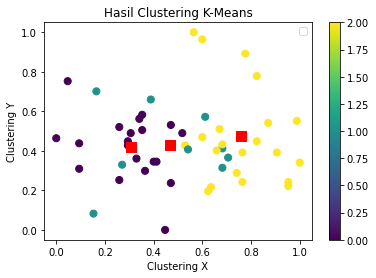

In [ ]:
output = plt.scatter(x_scaled[:,0], 
x_scaled[:,1], s = 200, c = Spotify.kluster, marker = ".", alpha = 1,)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, alpha=1 , marker="s");
plt.title("Hasil Clustering K-Means")
plt.xlabel("Clustering X")
plt.ylabel("Clustering Y")
plt.colorbar (output)
plt.legend()
plt.show()

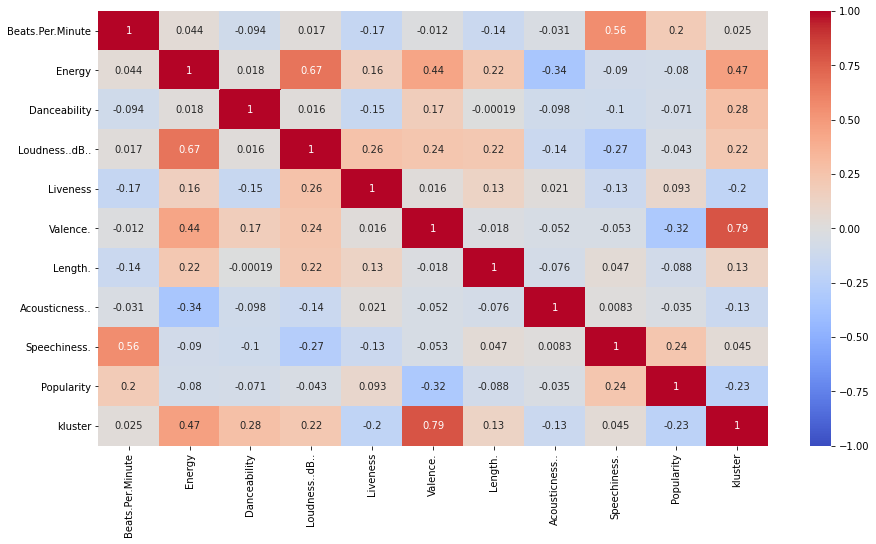

In [ ]:
corr = Spotify.corr()

plt.figure(figsize=(15,8))

sns.heatmap(corr, annot=True, vmin = -1, cmap='coolwarm')

plt.show()

Berdasarkan mapping diatas maka terjadinya korelasi antara Speechness dan Beats per minute (BPM), kemudian Energy dan Loudness.



> **Evaluasi Model**



**1. Analisa Genre paling populer di spotify pada tahun 2019**



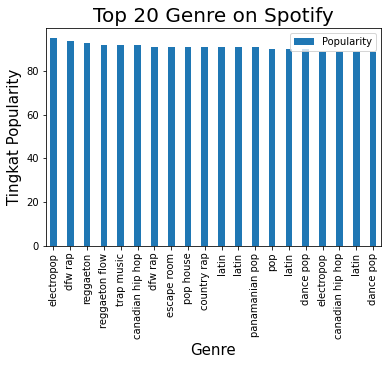

In [ ]:
df[["Genre","Popularity"]].nlargest(20,"Popularity").plot.bar(x="Genre",y="Popularity",width=0.4,)#'vertical', 'horizontal',color=color
plt.title("Top 20 Genre on Spotify",fontsize=20)
plt.xlabel("Genre",fontsize=15)
plt.ylabel("Tingkat Popularity",fontsize=15)
plt.show()

**2. Menganalisa kategori lagu terpopuler di spotify pada 2019**

In [ ]:
df[df.Popularity == max(df.Popularity)]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


Pada data diatas dinyatakan bahwa lagu terpopuler yang diamati dari jumlah popularity nya adalah "Bad Guy" yang dinyanyikan oleh Billie Ellish.

**3. Menganalisa kategori lagu dengan tingkat popularitas terendah pada 2019**

In [ ]:
df[df.Popularity == min(df.Popularity)]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
25,If I Can't Have You,Shawn Mendes,canadian pop,124,82,69,-4,13,87,191,49,6,70


Pada data diatas dinyatakan bahwa lagu yang termasuk dalam Top 50 Songs on Spotify pada tahun 2019 yang memiliki tingkat popularity ter-rendah adalah "If I Can't Have You" yang dinyanyikan oleh Shawn Mendes.

**4. Analisa Total Genre **

In [ ]:
df["Genre"].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
canadian pop        2
dfw rap             2
brostep             2
electropop          2
panamanian pop      2
country rap         2
reggaeton flow      2
reggaeton           2
big room            1
boy band            1
r&b en espanol      1
trap music          1
escape room         1
atl hip hop         1
australian pop      1
pop house           1
Name: Genre, dtype: int64

Pada data diatas dapat dianalisa total lagu pada masing-masing genre. Misalnya genre dance pop memunyai 8 total lagu pada dataset ini, dan merupakan genre yang paling banyak mempunyai lagu di Top 50 Songs on Spotify tahun 2019

In [ ]:
df[["Artist.Name","Popularity","Genre"]].nlargest(10,"Popularity")

,Artist.Name,Popularity,Genre
9,Billie Eilish,95,electropop
4,Post Malone,94,dfw rap
10,Bad Bunny,93,reggaeton
1,Anuel AA,92,reggaeton flow
6,Lil Tecca,92,trap music
14,Drake,92,canadian hip hop
17,Post Malone,91,dfw rap
19,Lizzo,91,escape room
20,MEDUZA,91,pop house
21,Lil Nas X,91,country rap


Dari data diatas dapat dilihat bahwa artis dengan perolehan popularitas lagu tertinggi yakni Billie Ellish dengan tingkat nilai popularity nya 95

inisialisai klasifikasi grafik x dan y 

In [ ]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

Menampilkan Plot

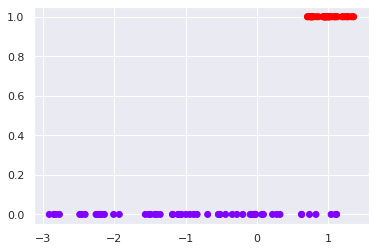

In [ ]:
plt.scatter(x, y, c=y, cmap='rainbow')

evaluasi subset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

Membuat model mempelajari hubungan antara digit (x_train) dan label (y_train)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Menampilkan evaluasi dengan melihat koefisien kemiringan dan perpotongan y dari garis yang paling cocok

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[2.73796738]]
[-1.27840304]
